In [1]:
import pandas as pd

In [2]:
text_data = pd.read_csv('../../05Lecture/data/cleaned/sms_spam_data_preprocessed.csv')

In [3]:
text_data.head()

,text_length,encoded_label,aa,aah,aaooright,aathi,ab,abbey,abdoman,abeg,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,111,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,155,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
text_data.shape

(5043, 6578)

In [5]:
text_data.encoded_label.value_counts(normalize=True)

# imbalanced datasets

encoded_label
0    0.870712
1    0.129288
Name: proportion, dtype: float64

In [6]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Columns: 6578 entries, text_length to zyada
dtypes: float64(6576), int64(2)
memory usage: 253.1 MB


In [7]:
text_data.isnull().sum()

text_length      0
encoded_label    0
aa               0
aah              0
aaooright        0
                ..
zogtorius        0
zoom             0
zouk             0
zs               0
zyada            0
Length: 6578, dtype: int64

In [8]:
# define the target and features

features = text_data.drop(['encoded_label'], axis=1)
target = text_data['encoded_label']

In [9]:
features.head()

,text_length,aa,aah,aaooright,aathi,ab,abbey,abdoman,abeg,abel,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
features.shape

(5043, 6577)

In [11]:
target.head()

0    0
1    0
2    1
3    0
4    0
Name: encoded_label, dtype: int64

In [12]:
target.shape

(5043,)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    random_state=8888)

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
X_train.shape

(4034, 6577)

In [15]:
X_test.shape

(1009, 6577)

In [16]:
y_train.shape

(4034,)

In [17]:
y_test.shape

(1009,)

In [18]:
# importing the algorithm
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()


In [19]:
# training your machine learning model

clf_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
# predict the labels for the test set

y_pred_dt = clf_tree.predict(X_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 1])

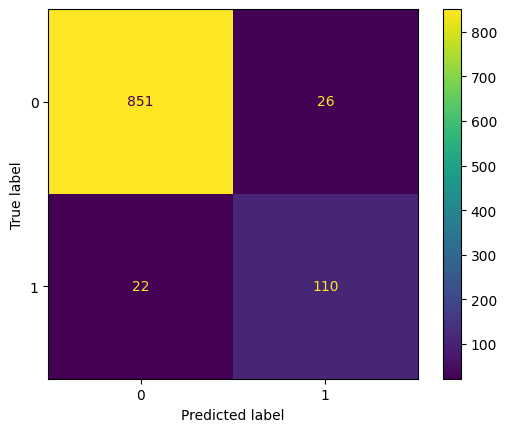

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# plot confusion matrix

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_tree.classes_)

disp.plot();

In [42]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_dt)

0.9524281466798811

In [43]:
(851+110)/(851+110+26+22)

0.9524281466798811

In [44]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred_dt)

0.8088235294117647

In [46]:
110/(110+26)

0.8088235294117647

In [45]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred_dt)

0.8333333333333334

In [47]:
110/(110+22)

0.8333333333333334

In [48]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_dt)

0.8208955223880597

In [34]:
# Plot the feature importance

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.feature_importance_plot import feature_importance_plot


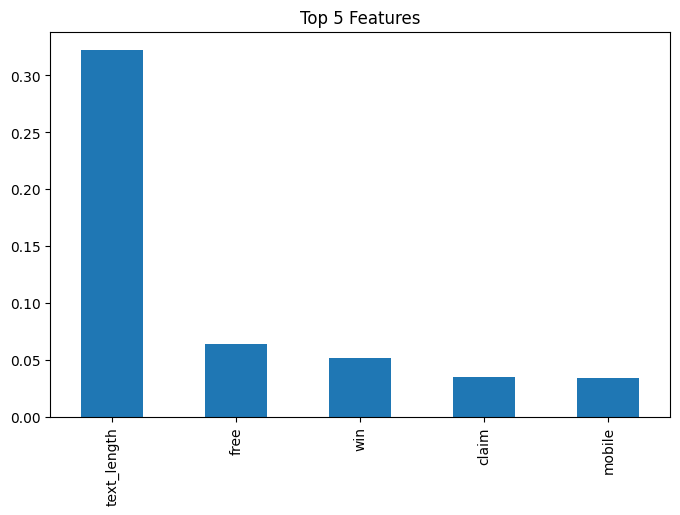

In [35]:
feature_importance_plot(clf_tree, X_train, n = 5)

In [38]:
# importing the algorithm
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()


In [39]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
y_pred_rf = clf_rf.predict(X_test)

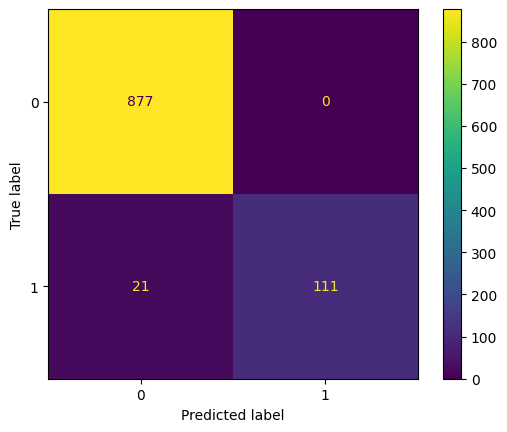

In [41]:
# plot confusion matrix

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rf.classes_)

disp.plot();

In [49]:
precision_score(y_test, y_pred_rf)

1.0

In [50]:
accuracy_score(y_test, y_pred_rf)

0.979187314172448

In [51]:
recall_score(y_test, y_pred_rf)

0.8409090909090909

In [52]:
f1_score(y_test, y_pred_rf)

0.9135802469135802